# Tugas Data Mining

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Mengukur jarak (TUGAS 1)

Tugas Mengukur Jarak (dissmilarity)
1. ambil data dari kaggle / github
2. ukur jarak d(1,2), d(1,3), d(1,4) objek dari data tersebut

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#mengimport data dari kaggle
data_url = 'https://raw.githubusercontent.com/triasmidwi/dataset/main/House_Rent_Dataset.csv'
dataset = pd.read_csv(data_url)

In [ ]:
dataset.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [ ]:
# Show dataset shape
number_of_columns = dataset.shape[1]
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### Categorical/Nominal
*   Area Type
*   Point Of Contact


In [ ]:
dataset[["Area Type", "Point of Contact"]].head(5)

,Area Type,Point of Contact
0,Super Area,Contact Owner
1,Super Area,Contact Owner
2,Super Area,Contact Owner
3,Super Area,Contact Owner
4,Carpet Area,Contact Owner


### Change Values to 1/0
Take all values of ‘Area Type’ series

*   If values is "Super Area" change to 1
*   If values is "Carpet Area" change to 0

In [ ]:
# Area Type code
areatype_for_SuperArea = "Super Area"
areatype_for_CarpetArea = "Carpet Area"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_areatype_to_biner(areatyped):
    return value_of_one if areatyped == areatype_for_SuperArea else value_of_zero

In [ ]:
# update semua data pada kolom Area Type
dataset["Area Type"] = dataset["Area Type"].apply(change_code_areatype_to_biner)

In [ ]:
dataset[["Area Type", "Point of Contact"]].head(5)

,Area Type,Point of Contact
0,1,Contact Owner
1,1,Contact Owner
2,1,Contact Owner
3,1,Contact Owner
4,0,Contact Owner


### Change Values to 1/0
Take all values of ‘Point of Contact’ series

*   If values is "Contact Owner" change to 1
*   If values is "Contact Agent" change to 0

In [ ]:
# Point of Contact code
PointOfContact_for_ContactOwner = "Contact Owner"
PointOfContact_for_ContactAgent = "Contact Agent"

# binary value
value_of_1 = 1
value_of_0 = 0

def change_code_pointofcontact_to_biner(PointOfContact):
    return value_of_1 if PointOfContact == PointOfContact_for_ContactOwner else value_of_0

In [ ]:
# update semua data pada kolom Point Of Contact
dataset["Point of Contact"] = dataset["Point of Contact"].apply(change_code_pointofcontact_to_biner)

In [ ]:
dataset[["Area Type", "Point of Contact"]].head(5)

,Area Type,Point of Contact
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1


In [ ]:
# Variable yang konstan
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(dataset, idx, series):
    return dataset.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(dataset, series_index = [], series = []):
    first_series = get_series(dataset, series_index[0], series)
    second_series = get_series(dataset, series_index[1], series)
    data = pd.concat([first_series,second_series],axis=1)
    return data.T

In [ ]:
get_dissimilarity_dataset(dataset, [1,2], ["Area Type", "Point of Contact"]).T

,1,2
Area Type,1,1
Point of Contact,1,1


In [ ]:
dataset.loc[0:5, ["Area Type", "Point of Contact"]]

,Area Type,Point of Contact
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
5,1,1


In [ ]:
def count_contingency_value(dataset, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = dataset.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(dataset.loc[(start_index):(last_index), dataset.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
dataset_1_2 = get_dissimilarity_dataset(dataset, [1,2], ["Area Type", "Point of Contact"])

In [ ]:
c_d_1_2 = count_contingency_value(dataset_1_2, 1, 2)

In [ ]:
# d(1,3)
dataset_1_3 = get_dissimilarity_dataset(dataset, [1,3], ["Area Type", "Point of Contact"])

In [ ]:
c_d_1_3 = count_contingency_value(dataset_1_3, 1, 3)

In [ ]:
# d(1,4)
dataset_1_4 = get_dissimilarity_dataset(dataset, [1,4], ["Area Type", "Point of Contact"])

In [ ]:
c_dataset_1_4 = count_contingency_value(dataset_1_4, 1, 4)

In [ ]:
# d(1,5)
dataset_1_5 = get_dissimilarity_dataset(dataset, [1,5], ["Area Type", "Point of Contact"])

In [ ]:
c_dataset_1_5 = count_contingency_value(dataset_1_5, 1, 5)

### Dissimilarity Binary Assymetric Value Formula
$$ \frac {p + r}{q + r + s} $$


In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [ ]:
d_1_2

0.0

In [ ]:
d_1_3

0.0

In [ ]:
d_1_4

0.0

## Diskritisasi (TUGAS 2)
1.   Carilah data yang bertipe numerik ( data klassifikasi)
2.   Lakukan proses diskritisasi dengan equal width dan equal frequency
3.   Lakukan proses diskritisasi dengan basis entropy
4.   Kumpulkan tugas dengan link github ( web statis dari jupyter book)



Diskretisasi adalah proses menempatkan nilai ke dalam wadah sehingga ada sejumlah kemungkinan status. Wadah itu sendiri diperlakukan sebagai nilai yang diurutkan dan diskrit. Anda dapat membedakan kolom numerik dan string.

Metode Diskritisasi
1. OTOMATIS	: SQL Server Analysis Services menentukan metode diskretisasi mana yang akan digunakan. 
2. CLUSTER	Algoritma membagi data menjadi beberapa grup dengan mengambil sampel data pelatihan, menginisialisasi ke sejumlah titik acak, lalu menjalankan beberapa perulangan algoritma Pengklusteran Microsoft menggunakan metode pengklusteran Maximization Ekspektasi (EM). Metode CLUSTERS berguna karena berfungsi pada kurva distribusi apa pun. Namun, ini membutuhkan lebih banyak waktu pemrosesan daripada metode diskretisasi lainnya. Metode ini hanya dapat digunakan dengan kolom numerik. 
3. EQUAL_AREAS	Algoritma membagi data menjadi grup yang berisi jumlah nilai yang sama. Metode ini paling baik digunakan untuk kurva distribusi normal, tetapi tidak berfungsi dengan baik jika distribusi menyertakan sejumlah besar nilai yang terjadi dalam grup sempit dalam data berkelanjutan


In [ ]:
# menggunakan library pandas
import pandas as pd

In [ ]:
# mengakses data 
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
# membaca data
dataset = pd.read_csv(dataset_url)

In [ ]:
# menampilkan 10 data
dataset.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
# set Variable konstan
SEPAL_LENGTH_SERIES = dataset["sepal.length"]
SEPAL_WIDTH_SERIES = dataset["sepal.width"]
PETAL_LENGTH_SERIES = dataset["petal.length"]
PETAL_WIDTH_SERIES = dataset["petal.width"]

#### Approaches to Discretization (Pendekatan Diskritisasi



> Unsupervised 
- Equal-Width
- Equal-Frequency
- K-means

> Supervised
- DEcisiom Trees

1.   Proses mengubah data bertipe data numeric menjadi data bertipe categorical

2. Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals

3. equal-width intervals adalah diskritisasi dengan lebar data yang sama

4. equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama



### Cut
* Cut adalah sebuah method pada library pandas untuk melakukan perhitungan equal width frequency intervals

Syntax
pd.cut(series, interval, right=True, label)

#### Sepal Width
* Equal Width Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning), axis=1)

,sepal.width,sepal.width
0,3.5,Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Lebar


In [ ]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

Lebar            88
Sedikit Lebar    47
Sangat Lebar     15
Name: sepal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

#### Petal Width
* Equal Width Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning), axis=1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
# equal-width intervals with label
labelled_petal_width_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

#### Sepal Length
* Equal Width Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Lebar
146,6.3,Lebar
147,6.5,Lebar
148,6.2,Lebar


In [ ]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

Lebar            71
Sedikit Lebar    59
Sangat Lebar     20
Name: sepal.length, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

#### Petal Length
* Equal Width Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [ ]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

### Qcut
* Qcut adalah sebuah method pada library pandas untuk melakukan perhitungan equal frequency intervals

Syntax 
pd.qcut(series, interval, label)

#### Sepal Width
* Equal Frequency Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning), axis = 1)

,sepal.width,sepal.width
0,3.5,Sangat Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Sangat Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Sangat Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

Sedikit Lebar    57
Lebar            50
Sangat Lebar     43
Name: sepal.width, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

#### Petal Width
* Equal Frequency Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning), axis = 1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

Lebar            52
Sedikit Lebar    50
Sangat Lebar     48
Name: petal.width, dtype: int64

In [ ]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

#### Sepal Length
* Equal Frequency Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-length and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Sangat Lebar
146,6.3,Lebar
147,6.5,Sangat Lebar
148,6.2,Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

Lebar            56
Sedikit Lebar    52
Sangat Lebar     42
Name: sepal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

#### Petal Length
* Equal Frequency Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-length and petal category
pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

### Definisi Entropy-based Binning

1.   Metode untuk mengelompokkan data *numeric* menjadi *categorical*
2.   Pengelompokkan dengan mencari jumlah pembagi yang terabaik
3.   Hasil pengelompokkan terbaik adalah dengan *entropy gain* yang paling besar


*  Rumus Entropy

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -pi \ log_{2} \ pi \\
\end{align*}
$$



#### Persiapan


*   Impor modul log2 dari *package math*
*   Ambil data yang akan digunakan


```
# dataframe about petal width (Equeal Frequency Interval)
df_petal_width_ef
```

*  Tentukan label


```
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
```



In [ ]:
# module to calculate log
from math import log2

In [ ]:
# dataframe
target_data = df_petal_width_ef
target_data

,petal_width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
2,0.2,sedikit_lebar,Setosa
3,0.2,sedikit_lebar,Setosa
4,0.2,sedikit_lebar,Setosa
...,...,...,...
145,2.3,sangat_lebar,Virginica
146,1.9,sangat_lebar,Virginica
147,2.0,sangat_lebar,Virginica
148,2.3,sangat_lebar,Virginica


In [ ]:
# category label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

##### Functions

###### Fungsi menghitung banyaknya data setiap kategori

In [ ]:
# count every value based the given category
def countEveryCategory(data_column, labels, column, category):
    group = data_column.groupby(category).count()
    amount_of_every_category = []
    for label in labels:
        amount_of_every_category.append(group.loc[label, column])
    return amount_of_every_category

###### Fungsi menghitung banyaknya data setiap kategori berdasarkan nilai pembagi atau *split value* yang diberikan

In [ ]:
# split the given data based on category and split value 
def split(split_value, data_column, labels, col, category):
    less_group = data_column[data_column[col] < split_value]
    greater_group = data_column[data_column[col] >= split_value]
    
    length_less_group = countEveryCategory(less_group, labels, col, category)
    length_greater_group = countEveryCategory(greater_group, labels, col, category)
    
    return (length_less_group, length_greater_group)

###### Fungsi menghitung perbedaan *gain* antara entropi inisial dengan entropi nilai pembagi yang diberikan




---
$$Gain(E_{new}) = (E_{initial}) \ - (E_{new})$$
---



In [ ]:
# count information gain from inisial entropy and new entropy
def count_gain(inisial_entropy, new_entropy):
  return inisial_entropy - new_entropy

###### Fungsi menghitung entropy

In [ ]:
# count entropy
def count_entropy(data_target):
    all_prob = []
    for prob in data_target:
        if (prob/sum(data_target) != 0):
            all_prob.append(prob/sum(data_target) * log2(prob/sum(data_target)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

###### Fungsi menghitung Info entropy berdasarkan nilai pembagi atau *split value* yang diberikan


---



$$ Info_A(D) = \frac{|D_1|}{|D|} Entropy (D_1)\frac{|D_2|}{|D|}+ Entropy (D_2)$$

In [ ]:
# count entropy for given a split value
def info(d, data_target):
    temp = []
    for value in d:
        temp.append((sum(value) / data_target.shape[0]) * count_entropy(value))
    return sum(temp)

###### Implementasi


*   Hitung target *entropy*
*   Hitung target *entropy* dengan *split value*
*   Hitung *entropy gain* 





*   **Entropy inisial atau awal**



In [ ]:
# entropy data target
initial_data_target_entropy = count_entropy(countEveryCategory(target_data, labels, target_data.columns[0], target_data.columns[1]))



*   **Entropy uji coba 1**
*   Nilai *split* yaitu 0.7
*   Data kurang dari $ < 0.7 $
*   Data kurang dari $ >= 0.7 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_1 = info(split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)



*   **Entropy uji coba 2**
*   Nilai *split* yaitu $ 1.4 $
*   Data kurang dari $ < 1.4 $
*   Data kurang dari $ >= 1.4 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_2 = info(split(1.4, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)



*   **Entropy uji coba 3**
*   Nilai *split* yaitu $ 2.1 $
*   Data kurang dari $ < 2.1 $
*   Data kurang dari $ >= 2.1 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_3 = info(split(2.1, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 1})$



In [ ]:
# information gain (entropy data target and entropy_data_target_1)
count_gain(initial_data_target_entropy, entropy_data_target_1)

0.9182958340544896

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 2})$

In [ ]:
# information gain (entropy data target and entropy_data_target_2)
count_gain(initial_data_target_entropy, entropy_data_target_2)

0.6536600192724277

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 3})$

In [ ]:
# information gain (entropy data target and entropy_data_target_3)
count_gain(initial_data_target_entropy, entropy_data_target_3)

0.2985203537604644

## Implementasi K-NN pada dataset iris (TUGAS 3)

KNN: K Nearest Neighbor adalah salah satu algoritma dasar dalam pembelajaran mesin. Model pembelajaran mesin menggunakan sekumpulan nilai input untuk memprediksi nilai output. KNN adalah salah satu bentuk paling sederhana dari algoritma pembelajaran mesin yang banyak digunakan untuk klasifikasi. Ini mengklasifikasikan titik data tentang bagaimana tetangganya diklasifikasikan

Metode KNN
1. Menentukan nilai K
2. Menghitung jarak antara data uji dengan data latih
3. mengurutkan jarak dari yang terkecil-terbesar
4. mengambil data sebanyak K terdekat
5. memilih kelas mayor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [ ]:
# mengakses data 
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
# membaca data
df = pd.read_csv(dataset_url)
#menampilkan data
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#mengecek jumlah baris dan jumlah kolom
df.shape

(150, 5)

In [ ]:
#membuat DataFrame kecuali kolom yang berisi target
X = df.drop(columns=['variety'])
#mengecek apakah kolom targer sudah berhasil dihilangkan
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#memisahkan kolom target dan dimasukkan ke dalam variable y
y = df['variety'].values
#menampilkan isi kolom target dari data 0-4
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
#melakukan split dataset ke dalam bentuk data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# membuat KNN klasifikasi, dengan menetapkan K/n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
# melakukan pencocokan klasifikasi dengan data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#menampilkan 5 model prediksi pada data test
knn.predict(X_test)[0:5]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
#mengecek akurasi dari data test
knn.score(X_test, y_test)

0.9666666666666667

Minimum error : -  0.03333333333333333 at K =  0


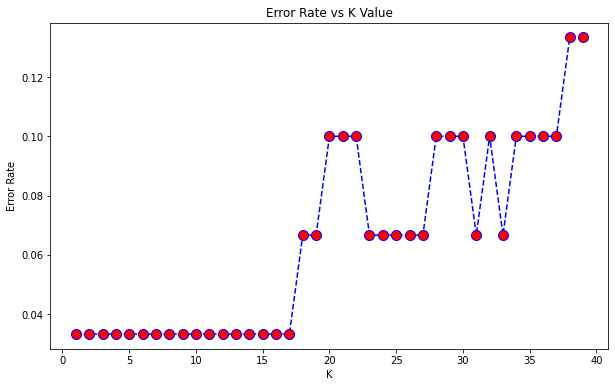

In [ ]:
#melakukan perbandingan Error rate dengan nilai K dan ditampilkan dalam bentuk grafik
error_rate=[]
for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error : - ", min(error_rate), "at K = ", error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9666666666666667 at K = 0


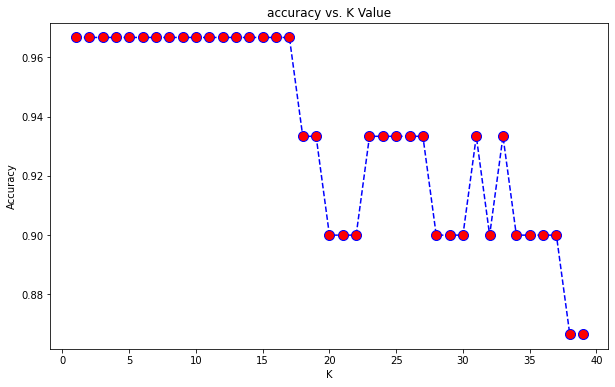

In [ ]:
#melakukan perbandingan dengan membandingkan akurasi dengan nilai K dan ditampilkan dalam bentuk grafik
acc = []
#will take some time
from sklearn import metrics
for i in range(1,40):
  neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## Gaussian Naive Bayes (TUGAS 4)

**Definisi Naive Bayes**

Naive Bayes adalah metode yang cocok untuk klasifikasi biner dan multiclass. Metode yang juga dikenal sebagai Naive Bayes Classifier ini menerapkan teknik supervised klasifikasi objek di masa depan dengan menetapkan label kelas ke instance/catatan menggunakan probabilitas bersyarat. Probabilitas bersyarat adalah ukuran peluang suatu peristiwa yang terjadi berdasarkan peristiwa lain yang telah (dengan asumsi, praduga, pernyataan, atau terbukti) terjadi. 

Istilah supervised merujuk pada klasifikasi training data yang sudah diberi label dengan kelas. Misalnya, sebuah transaksi penipuan telah ditandai sebagai data transaksional. Kemudian, jika Anda ingin mengklasifikasikan transaksi di masa depan menjadi fraudulent/non-fraudulent (penipuan/non-penipuan), maka jenis klasifikasi itu akan disebut sebagai supervised.

Nah, model machine learning yang diterapkan pada program tersebut menggunakan teorema Bayes yang dirumuskan sebagai berikut:

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# mengakses data 
dataset_url = "https://raw.githubusercontent.com/triasmidwi/dataset/main/Iris.csv"
# membaca data
iris = pd.read_csv(dataset_url)
#menampilkan data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris.drop(columns="Id",inplace=True)

In [ ]:
iris.head()
print(iris.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None



In [ ]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


## K-Means Clustering (Tugas 5)

**Definisi**

K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. K-Means Clustering Algoritma juga merupakan metode non-hierarchy. Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain. Cluster Sampling adalah teknik pengambilan sampel di mana unit-unit populasi dipilih secara acak dari kelompok yang sudah ada yang disebut ‘cluster, nah Clustering atau klasterisasi adalah salah satu masalah yang menggunakan teknik unsupervised learning.

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

K Means Clustering memiliki objective yaitu meminimalisasi object function yang telah di atur pada proses clasterisasi. Dengan cara minimalisasi variasi antar 1 cluster dengan maksimalisasi variasi dengan data di cluster lainnya.

**Algoritma K-means clustering**

Menentukan jumlah cluster

1.  Secara acak mendistribusikan data cluster
2.  Menghitung rata rata dari data yang ada di cluster.
3.  Menggunakan langkah baris 3 kembali sesuai nilai treshold
4.  Menghitung jarak antara data dan nilai centroid(K means clustering)
5.  Distance space dapat diimplementasikan untuk menghitung jarak data dan centroid. Contoh penghitungan jarak yang sering digunakan adalah manhattan/city blok distance












In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/triasmidwi/dataset/main/Iris.csv'
columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
x = data.values[:, 0:4]

In [ ]:
y = data.values[:,4]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfkelas = pd.DataFrame(label, columns=['class'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.cluster import KMeans
#number of cluster
kmeans = KMeans = KMeans(n_clusters=3)
#fitting the input data
kmeans= kmeans.fit(x_new)
#getting the clusters  labels
prediksi = kmeans.predict(x_new)
#centroids values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [ ]:
x_new[:,1:12].shape

(150, 1)

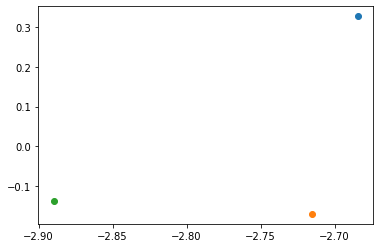

In [ ]:
from numpy import unique
from matplotlib import pyplot
from numpy import where 
yhat = unique(prediksi)
clusters = unique(yhat)
#create scatter plot for samples from each cluster
for cluster in clusters:
  #get row indexes for samples with this cluster
  row_ix = where (yhat == cluster)
  #create scatter of these samples
  pyplot.scatter(x_new[row_ix,0],x_new[row_ix,1])
#show the plot
pyplot.show()

In [ ]:
a=prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [ ]:
prediksi = np.array(a)
prediksi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label,prediksi)

0.09333333333333334

In [ ]:
type(x_new[row_ix, 0])

numpy.ndarray

In [ ]:
x_new[row_ix,0]

array([[-2.88981954]])

In [ ]:
x[row_ix,1]

array([[3.2]], dtype=object)

In [ ]:
yhat

array([0, 1, 2], dtype=int32)

## Decision Tree Classifier (Tugas 6)

**Pengertian Decision Tree**

Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab.
Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

**Jenis Decision Tree**

Ada dua jenis utama pohon keputusan berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

1. Pohon keputusan variabel kategori
Sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori. Misalnya, kategori bisa ya atau tidak. Kategori berarti bahwa setiap tahap proses pengambilan keputusan termasuk dalam salah satu kategori ini, dan tidak ada di antaranya.

2. Pohon keputusan variabel kontinu
Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. Misalnya, pendapatan individu yang pendapatannya tidak diketahui dapat diprediksi berdasarkan informasi yang tersedia seperti pekerjaan, usia, dan variabel kontinu lainnya.

**Rumus Gini Index**
$$ Gini Index = 1-Σ_i^n (P_i)^2 $$

In [ ]:
# import library Scikit Learn untuk Decision Tree, Dataset dan Matlotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_iris


In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/triasmidwi/dataset/main/Iris.csv'
#columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#menghilangkan kolom id
data.drop(columns='Id',inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#membuat DataFrame kecuali kolom yang berisi target
features = data.drop(columns=['Species'])
#mengecek apakah kolom target sudah berhasil dihilangkan
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#memisahkan kolom target dan dimasukkan ke dalam variable y
target = data['Species'].values
#menampilkan isi kolom target dari data 0-4
#target[:4]
print(target)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(features, target)

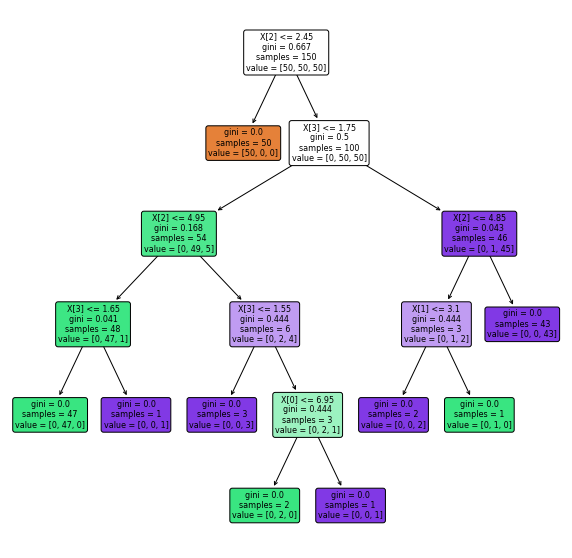

In [ ]:
#plt gambar, atur latar belakang hitam
plt.figure(figsize=(10,10))
#membuat plot pohon
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#menampilkan pohon
plt.show()

# Tugas 7

  ## Menggunakan Metode Naive Bayes

In [ ]:
#Import the packages
import numpy as np 
import pandas as pd 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import set_option
plt.style.use('ggplot')

In [ ]:
#Import the package
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

In [ ]:
#import the package
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# mengakses data 
dataset_url = "https://raw.githubusercontent.com/triasmidwi/dataset/main/credit_score.csv"
# membaca data
data_credit = pd.read_csv(dataset_url)
#menampilkan data
data_credit.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
#menampilkan info data berserta tipenya
print(data_credit.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               900 non-null    int64 
 1   kode_kontrak             900 non-null    object
 2   pendapatan_setahun_juta  900 non-null    int64 
 3   kpr_aktif                900 non-null    object
 4   durasi_pinjaman_bulan    900 non-null    int64 
 5   jumlah_tanggungan        900 non-null    int64 
 6   rata_rata_overdue        900 non-null    object
 7   risk_rating              900 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 56.4+ KB
None



In [ ]:
#melakukan drop kolom pada kolom yang unnamed
data_credit.drop(data_credit.columns[[0]], axis = 1)

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2
...,...,...,...,...,...,...,...
895,AGR-010739,112,YA,48,5,> 90 days,5
896,AGR-010744,120,YA,48,2,46 - 60 days,3
897,AGR-010758,166,TIDAK,24,2,0 - 30 days,1
898,AGR-010775,196,TIDAK,48,0,31 - 45 days,2


In [ ]:
# membuat var x, y untuk melakukan split data
# var x, kecuali kolom risk_rating
#data_credit.drop(data_credit.columns[[0]], axis = 1, inplace = True)
X = data_credit.drop(['risk_rating'], axis = 1)
y = data_credit['risk_rating']


In [ ]:
#melakukan split nilai
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#melakukan proses OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cols = ['kpr_aktif','rata_rata_overdue']
encoder = OneHotEncoder(sparse=False)
X_train = encoder.fit_transform(X_train[cols])
X_test = encoder.transform(X_test[cols])

In [ ]:
#melakukan proses MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#import library GaussianNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()

In [ ]:
model_gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model_gnb.predict(X_test)
#To measure Accuracy
from sklearn.metrics import accuracy_score
print(f'Model accuracy score: {100*accuracy_score(y_test, y_pred):0.2f}%')
print()

Model accuracy score: 100.00%



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]


##TUGAS 8 (Preprocessing Data Using MinMaxScaler)

In [2]:
from scipy.io import arff
import pandas as pd
data = arff.loadarff('/content/drive/MyDrive/datamining/tugas/messidor_features.arff')
df = pd.DataFrame(data[0])
df

FileNotFoundError: ignored

In [ ]:
#read data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

In [ ]:
df.columns = [col_names]
df

In [ ]:
X = df.drop(columns=['label'])
X

In [ ]:
df.head()

In [ ]:
y = df['label'].values
y

array([[b'0'],
       [b'0'],
       [b'1'],
       ...,
       [b'0'],
       [b'1'],
       [b'0']], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scala = scaler.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
scala

MinMaxScaler()

In [ ]:
data_normal = scaler.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit (y)
y=le.transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.shape

(1151, 20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB



training, test = train_test_split(df, train_size = 0.8, test_size = 0.2, shuffle=False)
training_label, test_label = train_test_split(y, train_size = 0.8, test_size = 0.2, shuffle=False)

clf2 = GaussianNB()
clf2.fit(training, training_label)

post = clf2.predict_proba(test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
import numpy as np
probas = post[:,1]
probas = np.round(probas)

In [ ]:
pred = probas
akurasi = roc_auc_score(test_label, pred)

In [ ]:
akurasi

1.0